In [102]:
! pip install pandas-datareader
! pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA #wont work
from pmdarima.arima import *
register_matplotlib_converters()
from time import time

In [103]:
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

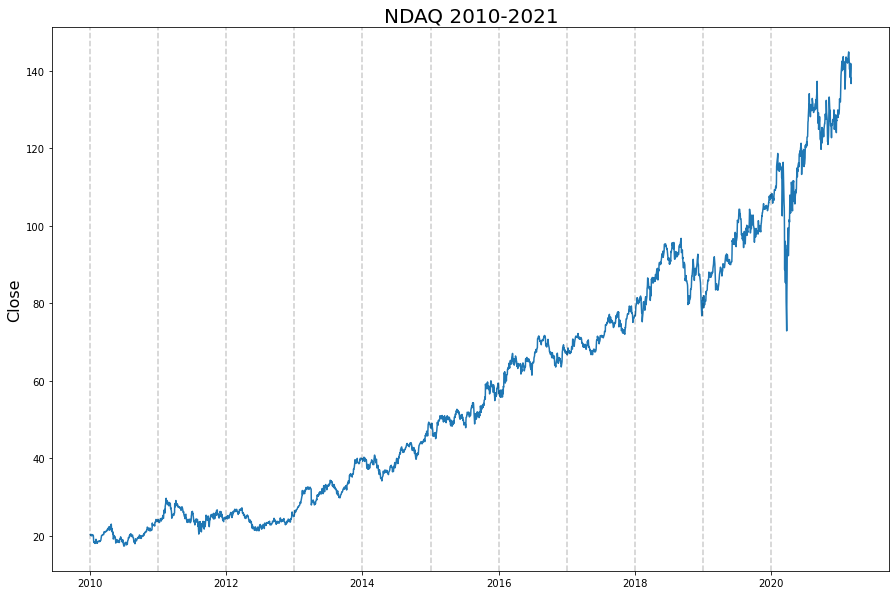

In [104]:
plt.figure(figsize=(15,10))
plt.plot(ts.Close)
plt.title('NDAQ 2010-2021', fontsize=20)
plt.ylabel('Close', fontsize=16)
for year in range(start.year,end.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [105]:
first_diff = ts.Close.diff()[1:]

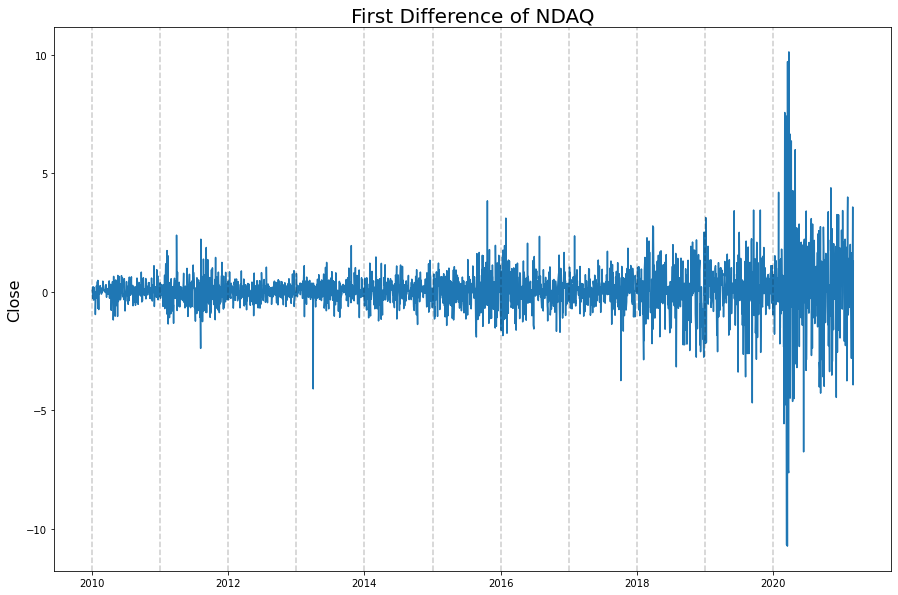

In [106]:
plt.figure(figsize=(15,10))
plt.plot(first_diff)
plt.title('First Difference of NDAQ', fontsize=20)
plt.ylabel('Close', fontsize=16)
for year in range(start.year,end.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    

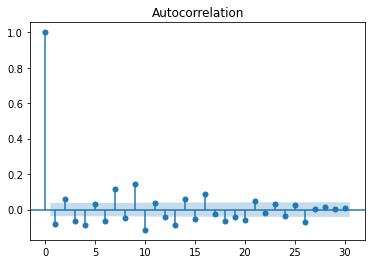

In [107]:

acf_plot = plot_acf(first_diff, lags=30)


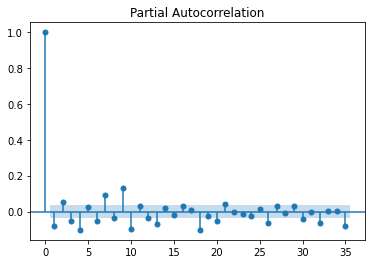

In [108]:
pacf_plot = plot_pacf(first_diff)

In [132]:
train_end = datetime(2021,1,20)
test_end = datetime(2021,3,4)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [84]:
#dpesnt work for some reason
model = ARIMA(train_data, order=(4,0,4))


TypeError: __init__() got multiple values for argument 'order'

In [88]:
stepwise_model = auto_arima(ts.Close, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=11.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10384.624, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9556.398, Time=0.75 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=15.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10377.933, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9086.140, Time=1.43 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=22.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=13.28 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9093.554, Time=1.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9075.987, Time=1.86 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9535.326, Time=1.07 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=32.59 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=14.95 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9063.002, Time=2.01 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

In [123]:
train = ts.Close.loc['2010-01-01':'2021-02-24']
test7 = ts.Close.loc['2021-02-24':]
test31 = ts.Close.loc['2021-01-20':]

In [124]:

model_fit = stepwise_model.fit(train)


In [125]:
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2805
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4488.691
Date:                            Fri, 05 Mar 2021   AIC                           8993.382
Time:                                    00:08:44   BIC                           9040.858
Sample:                                         0   HQIC                          9010.522
                                           - 2805                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0507      0.007     -7.525      0.000      -0.064      -0.038
ar.L2          0.0748      0.007   

In [130]:
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)


7
31
2805


ValueError: Shape of passed values is (7, 1), indices imply (253, 1)